# Programming Exercise 4b: Neural Network Class

In this version of the exercise 4 we will achieve the same objective but implementing a NN class in python.

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralNetworkClass import *

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In this section we are configuring the NN layers and neurons.
Each of the dimensions of the nnDef vector represents a layer. The value for each dimension represents the number of neurons per layer (this is not considering the bias neuron, which is added during the NN training).

In [10]:
## NN definition
input_layer_size  = np.array([400])  # 20x20 Input Images of Digits
hidden_layer = np.array([25])   # 25 hidden units
num_labels = np.array([10])          # 10 labels, from 0 to 9 - output layer

# trying to represent the NN using an array.
# nnDef.shape[0] = number of layers
# nnDef[i] = number of neurons on layer i
nnDef = np.concatenate((input_layer_size, hidden_layer, num_labels), axis=None)

In [11]:
# Loading all data on a dictonary
data = loadmat('ex4data1.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

# m = number of training examples
# n = number of features
(m,n) = X.shape

# note that X has mapped "0" to label 10 because Matlab arrays start on 1
# We'll normalize the 10 value back to 0, so it matches the 0 digit
y[y == 10] = 0

## Train the NN

In [12]:
# Initialize the NN
nn=NNClassifier(nnDef, 500, 2)

In [13]:
# Train the NN
nn.fit(X,y)
# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(nn.cost))

Cost at theta found by optimize.minimize: 0.459


In [14]:
pred = nn.predict(X)
print('\nTraining Set Accuracy: {:.2f} %'.format(np.mean(pred == y) * 100))


Training Set Accuracy: 98.44 %


## Test the model with my own handwritten numbers
In order to test the model with my own handwritten numbers 
> I am taking inspiration from this article: 
> https://medium.com/@ashok.tankala/build-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python-f8ec9f871fd3

The data in the 'data.csv' has been created from handwritten numbers. Follow this 'Image processing experiments with Pillow.ipynb' in the same folder.

In [19]:
data = pd.read_csv('My handwritten numbers\data.csv', header=None)
X_test = data.iloc[:,:].to_numpy(dtype='uint8')

In [20]:
pred = nn.predict(X_test)

### Compare number and prediction

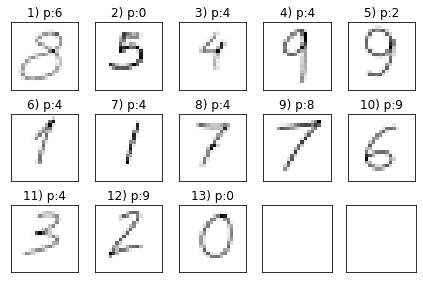

In [21]:
Check_cases = X_test.shape[0]

fig, ax = plt.subplots(nrows = 3, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(Check_cases):
    img = X_test[i].reshape(20,20)
    ax[i].imshow(img, cmap = 'Greys', interpolation = 'nearest')
    ax[i].set_title('%d) p:%d' % (i+1, pred[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()